In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# dropping unnamed column

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


# scatter plot

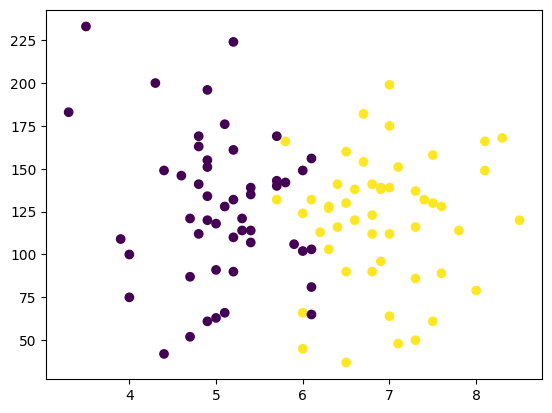

In [8]:

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [9]:
x=df.drop(columns='placement')
y=df['placement']


In [10]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# train test split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [13]:
x_train.shape

(80, 2)

In [14]:
x_test.shape

(20, 2)

In [15]:
y_train.shape

(80,)

In [16]:
y_test.shape

(20,)

In [17]:
y_train_plot=y_train

# Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [19]:
x_train,x_test

(array([[ 1.36890093,  0.83460594],
        [-0.95747673,  0.96087007],
        [-1.64677381, -1.26137872],
        [ 0.3349553 ,  0.07702112],
        [ 0.93809025,  1.263904  ],
        [-0.87131459,  0.22853809],
        [ 1.45506306,  0.07702112],
        [-0.61282819,  0.17803243],
        [ 1.36890093,  0.12752678],
        [ 0.16263103,  0.17803243],
        [ 0.0764689 ,  0.60733049],
        [ 0.3349553 , -0.55429956],
        [ 0.3349553 ,  0.0517683 ],
        [-0.44050392, -0.27651846],
        [ 1.88587374,  1.03662856],
        [ 1.19657666, -1.8926994 ],
        [ 0.50727957, -2.22098615],
        [-1.38828741,  1.89522468],
        [ 0.0764689 , -0.02399019],
        [ 1.62738733, -0.27651846],
        [-0.87131459,  0.75884746],
        [ 1.45506306, -0.90783914],
        [-2.24990876,  1.46592662],
        [ 0.76576598,  0.40530788],
        [ 0.59344171, -0.12500149],
        [ 0.50727957,  0.88511159],
        [-0.69899032,  0.07702112],
        [ 0.85192811, -0.731

# model training and prediction

In [20]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
y_train.shape

(80, 1)

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='saga')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,y_pred)

0.9

# plotting decision boundary

<AxesSubplot: >

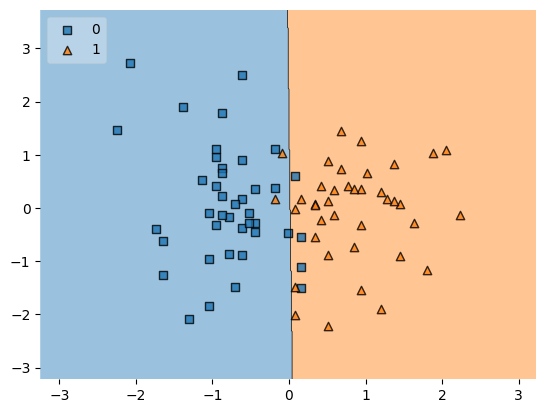

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train_plot.values,clf=lr,legend=2)

In [25]:
import pickle 
pickle.dump(lr,open('model.pkl','wb'))